# Machine Learning - Decision Tree (Arvore de Decisão Aleatória)

In [51]:
# importando as bibliotecas necessárias

from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Carregando o dataset Iris
iris = load_iris()

In [3]:
# Verificando a descrição do dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# Verificando features names, target e dados
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
x=iris.target_names
def print_target_names ():
    for i in range(len(x)):
        print(x[i])

In [7]:
print_target_names()

setosa
versicolor
virginica


In [49]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Dividindo os dados em treino e teste

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.3)

Verificando a forma dos dados

In [11]:
x_train.shape,x_test.shape

((105, 4), (45, 4))

In [12]:
y_train.shape,y_test.shape

((105,), (45,))

Instanciando o objeto classificador

In [45]:
clf = tree.DecisionTreeClassifier()

#### Parametros do classificador DecisionTreeClassifier
- criterion: medida de qualidade de divisão
- splitter: estratégia utilizada para divider o nó de decisão
- max_depth: profundidade máxima da árvore
- min_samples_split: número de amostras mínimas para considerar um nó para divisão
- min_samples_leaf: número de amostras mínimas no nível folha

Treinando o modelo de árvore de decisão

In [14]:
clf = clf.fit(x_train,y_train)
clf

DecisionTreeClassifier()

Verificando as features mais importantes par ao modelo de árvore de decisão treinado

In [15]:
clf.feature_importances_

array([0.        , 0.        , 0.04084967, 0.95915033])

In [16]:
for feature,importancia in zip(iris.feature_names,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

sepal length (cm):0.0
sepal width (cm):0.0
petal length (cm):0.04084967320261441
petal width (cm):0.9591503267973855


Executando o algoritmo de arvore de decisão com o conjunto de teste

In [17]:
resultado = clf.predict(x_test)
resultado

array([2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
       0])

Testando com uma nova amostra

In [18]:
test = np.array([[5.1,3.5,1.4,0.2]])
clf.predict(test)

array([0])

Verificando a probabilidade

In [19]:
clf.predict_proba(test)

array([[1., 0., 0.]])

Métricas de Validação

In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.93      0.93      0.93        14
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Biblioteca para utilização de widgets interativos

In [21]:
!pip install ipywidgets

Biblioteca para visualização da árvore de decisão (o ponto de exclamação (!) quer dizer que vamos instalar a nível do sistema operacional python

In [22]:
!pip3 install pydot

In [23]:
!pip3 install graphviz

In [24]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [25]:
conda install ipywidgets

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\marcf\anaconda3

  added / updated specs:
    - ipywidgets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ipywidgets-7.6.5           |     pyhd3eb1b0_1         105 KB
    ------------------------------------------------------------
                                           Total:         105 KB

The following packages will be UPDATED:

  ipywidgets                             7.6.3-pyhd3eb1b0_1 --> 7.6.5-pyhd3eb1b0_1 None




ipywidgets-7.6.5     | 105 KB    |            |   0% 
ipywidgets-7.6.5     | 105 KB    | ########## | 100% 
ipywidgets-7.6.5     | 105 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to 



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [29]:
!pip freeze | grep ipywidgets

'grep' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


Importando as bibliotecas instaladas

In [26]:
pip --version

pip 21.0.1 from C:\Users\marcf\anaconda3\lib\site-packages\pip (python 3.8)

Note: you may need to restart the kernel to use updated packages.


In [34]:
conda install graphviz

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\marcf\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hda2c7e1_0         676 KB
    libffi-3.4.2               |       hd77b12b_6  



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




  getopt-win32       pkgs/main/win-64::getopt-win32-0.1-h2bbff1b_0 None
  glib               pkgs/main/win-64::glib-2.69.1-h5dc1a3c_1 None
  graphite2          pkgs/main/win-64::graphite2-1.3.14-hd77b12b_1 None
  graphviz           pkgs/main/win-64::graphviz-2.50.0-hdb8b0d4_0 None
  gts                pkgs/main/win-64::gts-0.7.6-h63ab5a1_3 None
  harfbuzz           pkgs/main/win-64::harfbuzz-4.3.0-hda2c7e1_0 None
  libffi             pkgs/main/win-64::libffi-3.4.2-hd77b12b_6 None
  libgd              pkgs/main/win-64::libgd-2.3.3-ha43c60c_1 None
  pango              pkgs/main/win-64::pango-1.50.7-h78c2152_0 None
  pcre               pkgs/main/win-64::pcre-8.45-hd77b12b_0 None
  pixman             pkgs/main/win-64::pixman-0.40.0-h2bbff1b_1 None

The following packages will be UPDATED:

  zlib                                    1.2.11-h62dcd97_4 --> 1.2.13-h8cc25b3_0 None




pango-1.50.7         | 279 KB    |            |   0% 
pango-1.50.7         | 279 KB    | #1         |  11% 
pango

In [31]:
import pydot
import graphviz
from ipywidgets import interactive

Visualizando de forma gráfica a árvore gerada

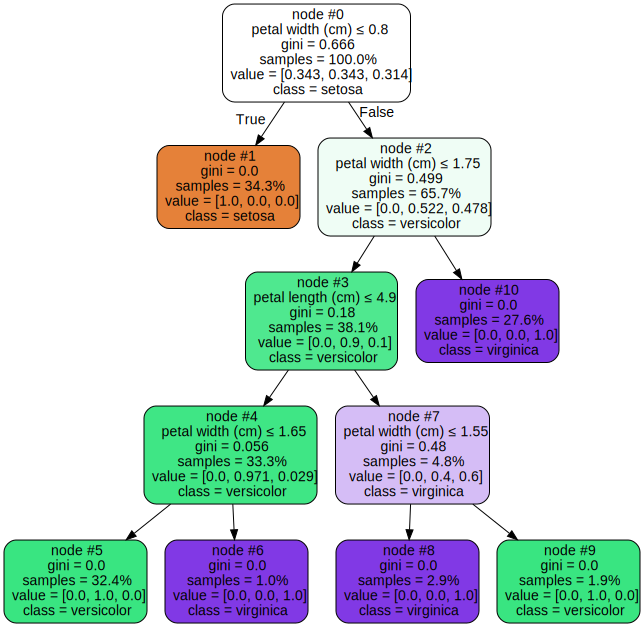

In [36]:
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True,
                                rounded=True,
                                proportion=True,
                                node_ids=True,
                                rotate=False,
                                label='all',
                                special_characters=True
                                )

graph = graphviz.Source(dot_data)
graph

Bibliotecas necessárias para renderização da árvore de forma interativa

In [38]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

Renderizando a árvore de forma interativa através da manipulação de parametros

In [46]:
# load datasest
data = load_iris()

# feature matrix
x = data.data

# target vector
y = data.target

# feature labels
features_label = data.feature_names

#class_label
class_label = data.target_names

def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = tree.DecisionTreeClassifier(random_state = 0,
                                            criterion = crit,
                                            splitter = split,
                                            max_depth = depth,
                                            min_samples_split=min_split,
                                            min_samples_leaf=min_leaf)
    
    estimator.fit(x,y)
    graph = Source(tree.export_graphviz(estimator,
                                        out_file=None,
                                        feature_names=features_label,
                                        class_names=class_label,
                                        filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree,
                  crit = ['gini','entropy'],
                  split = ['best','random'],
                  depth=[1,2,3,4,5],
                  min_split=(0.1,1),
                  min_leaf=(0.1,0.5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [47]:
iris = load_iris()
x = iris.data
y=iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [52]:
estimator = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [56]:
n_nodes = estimator.tree_.node_count

children_left = estimator.tree_.children_left

children_right = estimator.tree_.children_right

feature = estimator.tree_.feature

threshold = estimator.tree_.threshold

In [57]:
print("Numero de nós: {}".format(n_nodes))
print('Indices a esquerda: {}'.format(children_left))
print('Indices a direita: {}'.format(children_right))
print('FeatureÇ {}'.format(feature))
print('Limite threshold: '.format(threshold))

Numero de nós: 5
Indices a esquerda: [ 1 -1  3 -1 -1]
Indices a direita: [ 2 -1  4 -1 -1]
FeatureÇ [ 3 -2  2 -2 -2]
Limite threshold: 


In [66]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0,-1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1
    
    if (children_left[node_id] != childre_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((childre_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
        
print('\nA árvore binária tem %s nós e a seguinte estrutura: \n'% n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print('%snó=%s (nó folha).' % (node_depth[i] * '\t', i))
    else:
        print('%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s se não,' 
              ' vai para o nó %s.' 
              % (node_depth[i] * '\t',
                 i,
                children_left[i],
                iris.feature_names[feature[i]],
                threshold[i],
                children_right[i]
                 )
              )


A árvore binária tem 5 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo petal width (cm) <= 0.800000011920929 se não, vai para o nó 2.
	nó=1 (nó folha).
	nó=2 (nó teste): vai para o nó 3 se o valor do atributo petal length (cm) <= 4.950000047683716 se não, vai para o nó 4.
		nó=3 (nó folha).
		nó=4 (nó folha).


Extraindo regras da árvore gerada a partir de uma determinada amostra do conjunto de teste x_teste

In [70]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(x_test)
    
    leave_id = estimator.apply(x_test)
    
    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]
    
    print('\nRegras usadas para predizer a amostra %s' % (sample_id))
    
    for f,v in zip(iris.feature_names,x_test[sample_id]):
        print('%s = %s'%(f,v))
        
    print('\n')
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue
        if(x_test[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = '<='
        else:
            threshold_sign = '>'
        print('id do nó de decisão %s : (atributo %s com o valor = %s %s %s)'
              % (node_id,
                 iris.feature_names[node_id],
                 x_test[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]
                 )
             )
    pred = estimator.predict(x_test[sample_id].reshape(1,-1))
    print('\tClasse => %s' %iris.target_names[pred])

In [74]:
extrai_regras(3)


Regras usadas para predizer a amostra 3
sepal length (cm) = 7.3
sepal width (cm) = 2.9
petal length (cm) = 6.3
petal width (cm) = 1.8


id do nó de decisão 0 : (atributo sepal length (cm) com o valor = 1.8 > 0.800000011920929)
id do nó de decisão 2 : (atributo petal length (cm) com o valor = 6.3 > 4.950000047683716)
	Classe => ['virginica']


Instalação da biblioteca mlextend para visualização das fronteiras de complexidade

In [77]:
!pip install mlxtend

  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


Entendo o parâmetro min-samples-split para a criação do modelo de árvore de decisão

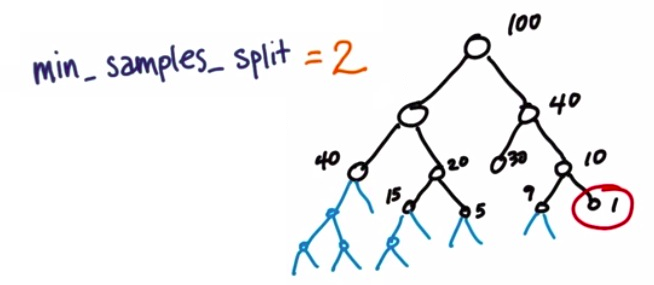

In [82]:
from IPython.display import Image
Image(filename=r"C:\Users\marcf\OneDrive\Documentos\Ciencia de dados\Árvores de decisão e Florestas Aleatórias\arvore-decisao-materiais-apoio\imagens\min-samples-split.png", width=500, height=500)

Visualizando as fronteiras criadas pela árvore

In [83]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [84]:
def visualize_fronteiras(msamples_split):
    x=iris.data[:,[0,2]]
    y=iris.target
    
    clf=DecisionTreeClassifier(min_samples_split=msamples_split)
    tree = clf.fit(x,y)
    
    plt.figure(figsize=(8,5))
    plot_decision_regions(x,y,clf=tree,legend=2)
    
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title('Decision Tree on Iris')
    plt.show

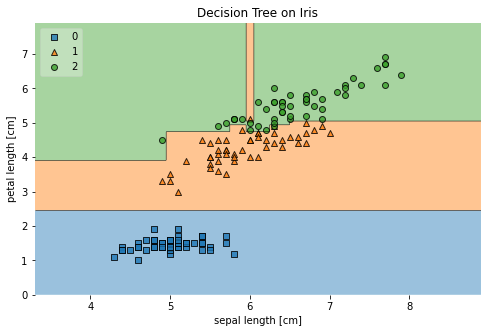

In [85]:
visualize_fronteiras(2)

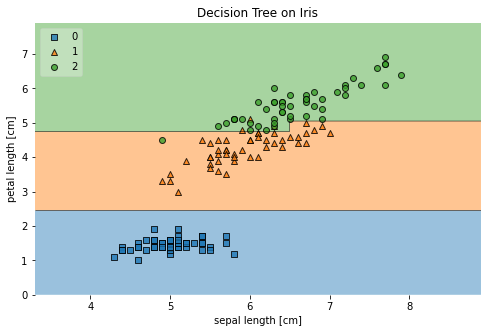

In [86]:
visualize_fronteiras(10)